# Nadin Ashraf Hassan 46-6686 T4
# Mariam Wael 46-1356 T5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [2]:
df_gene = pd.read_csv('gene_expression.csv')
df_income = pd.read_csv('train.csv')
df_heart = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [50]:
df_heart_2 = df_heart.copy()
df_heart_2.drop(df_heart_2.sample(n = 126840).index,
        inplace = True)

In [51]:
df_heart_2.shape

(126840, 22)

In [52]:
scaler2 = StandardScaler()
dfheart2_features = df_heart_2.drop('HeartDiseaseorAttack',axis=1)
dfheart2_label = df_heart_2['HeartDiseaseorAttack']
X_trainH2, X_testH2, y_trainH2, y_testH2 = train_test_split(dfheart2_features,dfheart2_label, test_size=0.1, random_state=101)
scaledH2_X_train = scaler2.fit_transform(X_trainH2)
scaledH2_X_test = scaler2.transform(X_testH2)

In [3]:
df_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
dfincome = df_income.drop(['education'],axis=1)

In [5]:
dfincome.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income_>50K'],
      dtype='object')

In [6]:
dfincome = dfincome.dropna()

In [7]:
((dfincome['native-country'].isna().sum())/len(dfincome.workclass))*100

0.0

In [8]:
dfincome.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [9]:
def number_encode_features(df):
    result = df.copy()
    for column in result.columns:
        if result.dtypes[column] == np.object:
            result[column] = preprocessing.LabelEncoder().fit_transform(result[column])
    return result
encoded_data = number_encode_features(dfincome)
encoded_data.tail(5)

C:\Users\nadin\AppData\Local\Temp\ipykernel_38820\3468736674.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtypes[column] == np.object:


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
43952,52,2,68982,13,2,3,0,4,1,0,0,50,38,1
43953,19,2,116562,9,4,7,3,4,0,0,0,40,38,0
43954,30,2,197947,10,0,11,1,4,1,0,0,58,38,0
43955,46,2,97883,13,4,11,1,4,0,0,0,35,38,0
43956,30,2,375827,9,4,5,2,4,1,0,0,40,38,0


<AxesSubplot: xlabel='Gene One', ylabel='Cancer Present'>

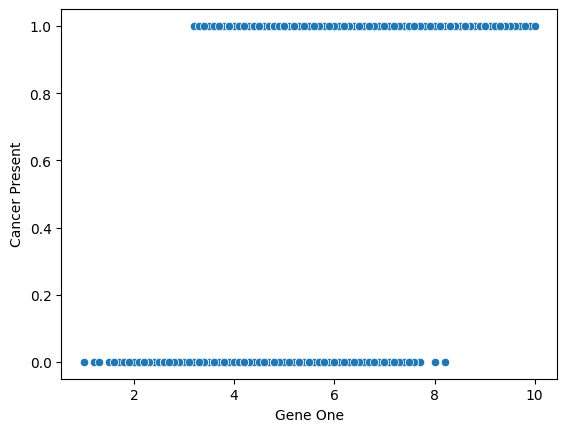

In [10]:
sns.scatterplot(x='Gene One',y='Cancer Present',data=df_gene)

In [11]:
## Removing outlier point from the gene dataset
gene = df_gene.copy()
geneIndex = df_gene[(df_gene['Gene Two']>8) & (df_gene['Cancer Present']==1.0)].index
gene = gene.drop(geneIndex,axis=0)

<AxesSubplot: xlabel='age', ylabel='income_>50K'>

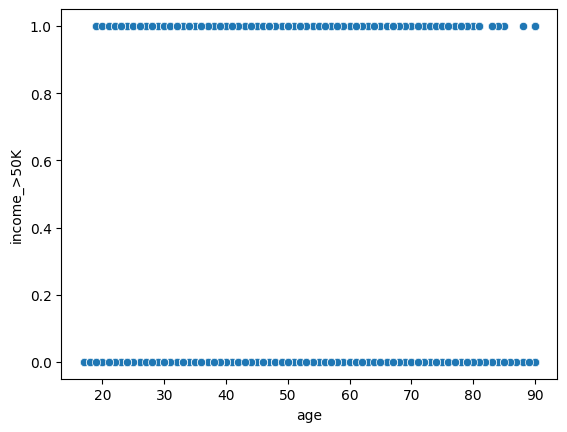

In [12]:
sns.scatterplot(x='age',y='income_>50K',data=encoded_data)

<AxesSubplot: xlabel='educational-num', ylabel='income_>50K'>

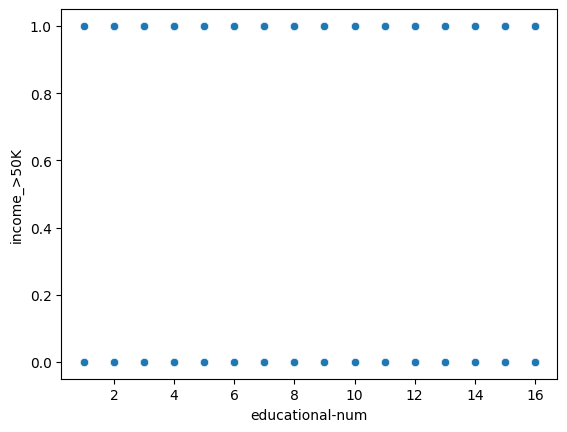

In [13]:
sns.scatterplot(x='educational-num',y='income_>50K',data=encoded_data)

<AxesSubplot: xlabel='capital-gain', ylabel='income_>50K'>

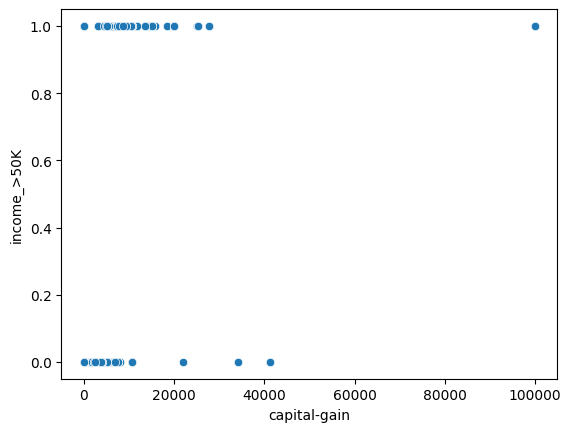

In [14]:
sns.scatterplot(x='capital-gain',y='income_>50K',data=encoded_data)

<AxesSubplot: xlabel='capital-loss', ylabel='income_>50K'>

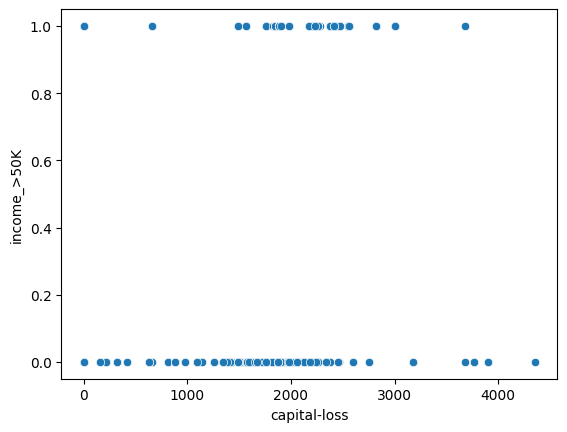

In [15]:
sns.scatterplot(x='capital-loss',y='income_>50K',data=encoded_data)

<AxesSubplot: xlabel='hours-per-week', ylabel='income_>50K'>

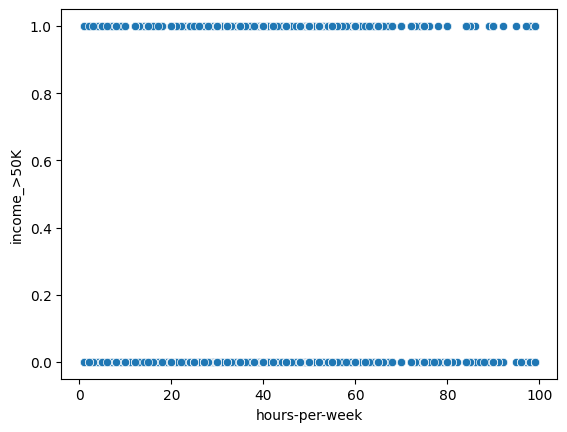

In [16]:
sns.scatterplot(x='hours-per-week',y='income_>50K',data=encoded_data)

<AxesSubplot: xlabel='fnlwgt', ylabel='income_>50K'>

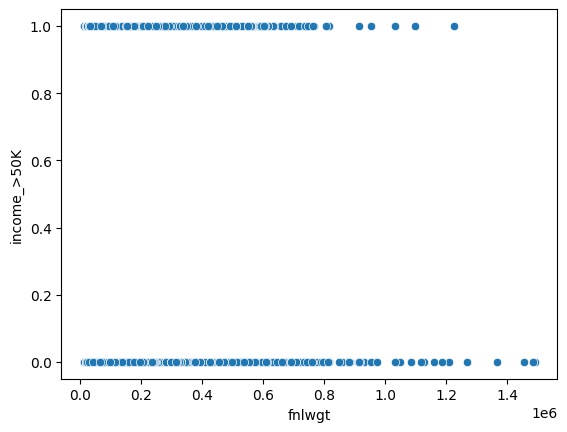

In [17]:
sns.scatterplot(x='fnlwgt',y='income_>50K',data=encoded_data)

In [13]:
## Removing outlier point from the gene dataset
test = encoded_data.copy()
testIndex1 = encoded_data[(encoded_data['age']>80) & (encoded_data["income_>50K"] == 1)].index
testIndex2 = encoded_data[(encoded_data['fnlwgt'] > 0.8) & (encoded_data['income_>50K'] == 1)].index
testIndex3 = encoded_data[((encoded_data['capital-gain']>100000) & (encoded_data['income_>50K'] == 1)) | ((encoded_data['capital-gain']>2000) & (encoded_data["income_>50K"] == 0))].index
testIndex4 = encoded_data[(((encoded_data['capital-loss']< 1000) & (encoded_data["income_>50K"] ==1)) | (encoded_data['capital-loss']>2900))].index

In [14]:
res =  (testIndex1.values.tolist()) + (testIndex2.values.tolist()) + (testIndex3.values.tolist()) + (testIndex4.values.tolist())


In [15]:
res = list(dict.fromkeys(res))

In [16]:
test.drop(res,axis=0,inplace=True)

In [17]:
df_heart.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [18]:
heart = df_heart.copy()
heart.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<AxesSubplot: xlabel='BMI', ylabel='HeartDiseaseorAttack'>

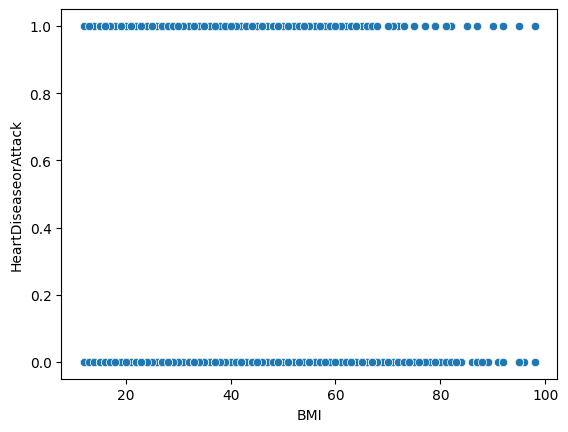

In [24]:
sns.scatterplot(x='BMI',y='HeartDiseaseorAttack',data=heart)

In [19]:
heartIndex1 = heart[(heart['BMI']>95)].index

In [20]:
heart.drop(heartIndex1,axis=0,inplace=True)

In [21]:
dfheart_features = df_heart.drop('HeartDiseaseorAttack',axis=1)
dfheart_label = df_heart['HeartDiseaseorAttack']
X_trainH, X_testH, y_trainH, y_testH = train_test_split(dfheart_features,dfheart_label, test_size=0.1, random_state=101)

In [22]:
scaler = StandardScaler()

In [23]:
scaledH_X_train = scaler.fit_transform(X_trainH)
scaledH_X_test = scaler.transform(X_testH)

In [24]:
dftest_features = encoded_data.drop('income_>50K',axis=1)
dftest_label = encoded_data['income_>50K']
X_trainT, X_testT, y_trainT, y_testT = train_test_split(dftest_features,dftest_label, test_size=0.1, random_state=101)

In [25]:
scaledT_X_train = scaler.fit_transform(X_trainT)
scaledT_X_test = scaler.transform(X_testT)

In [26]:
dfgene_features = df_gene.drop('Cancer Present',axis=1)
dfgene_label = df_gene['Cancer Present']
X_trainG, X_testG, y_trainG, y_testG = train_test_split(dfgene_features,dfgene_label, test_size=0.1, random_state=101)

In [27]:
scaledG_X_train = scaler.fit_transform(X_trainG)
scaledG_X_test = scaler.transform(X_testG)

In [28]:
log_modelH = LogisticRegression()
log_modelT = LogisticRegression()
log_modelG = LogisticRegression()

In [29]:
log_modelH.fit(scaledH_X_train,y_trainH)

LogisticRegression()

In [30]:
log_modelT.fit(scaledT_X_train,y_trainT)

LogisticRegression()

In [31]:
log_modelG.fit(scaledG_X_train,y_trainG)

LogisticRegression()

In [32]:
y_predH = log_modelH.predict(scaledH_X_test)
y_predT = log_modelT.predict(scaledT_X_test)
y_predG = log_modelG.predict(scaledG_X_test)

In [33]:
heart_accuracy = accuracy_score(y_testH,y_predH)
test_accuracy =  accuracy_score(y_testT,y_predT)
gene_accuracy = accuracy_score(y_testG,y_predG)
print(heart_accuracy," ", test_accuracy, " ",gene_accuracy)

0.9060627562283191   0.8286275472624601   0.8466666666666667


In [34]:
print(classification_report(y_testH,y_predH))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     22928
         1.0       0.55      0.14      0.22      2440

    accuracy                           0.91     25368
   macro avg       0.73      0.56      0.58     25368
weighted avg       0.88      0.91      0.88     25368



In [35]:
print(classification_report(y_testT,y_predT))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3073
           1       0.72      0.49      0.58      1000

    accuracy                           0.83      4073
   macro avg       0.79      0.71      0.74      4073
weighted avg       0.82      0.83      0.82      4073



In [36]:
print(classification_report(y_testG,y_predG))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       136
           1       0.86      0.86      0.86       164

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



### KNN

#### Heart Dataset

In [45]:
error = []
for i in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(scaledH_X_train,y_trainH)
    yH_predict = knn_model.predict(scaledH_X_test)
    testError = 1- (accuracy_score(y_testH,yH_predict))
    error.append(testError)

c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [46]:
error

[0.14001892147587514,
 0.10138757489750871,
 0.11463260801009145,
 0.10063859981078527,
 0.1065909807631662,
 0.09953484705140336,
 0.10264900662251653,
 0.097524440239672,
 0.10028382213812681,
 0.09709082308420058,
 0.09870703248186696,
 0.09689372437716803,
 0.09795805739514352,
 0.09626300851466418,
 0.09740618101545251,
 0.09622358877325765,
 0.0966966256701356,
 0.09571113213497318,
 0.09661778618732264,
 0.09602649006622521]

Text(0.5, 0, 'knn-neighbors')

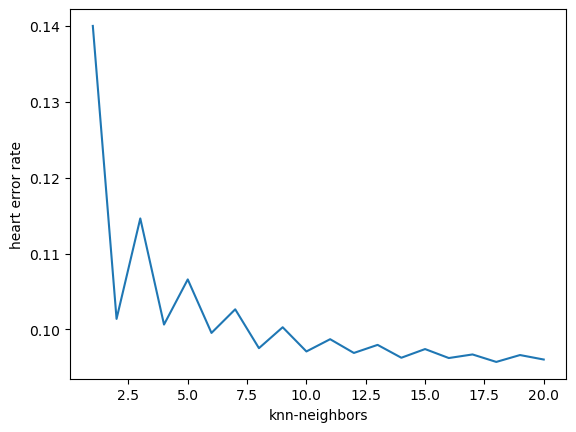

In [50]:
plt.plot(range(1,21),error)
plt.ylabel("heart error rate")
plt.xlabel("knn-neighbors")

In [125]:
knn_model_Heart = KNeighborsClassifier(n_neighbors=8)
knn_model_Heart.fit(scaledH_X_train,y_trainH)
yH_pred = knn_model.predict(scaledH_X_test)

c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [126]:
print(classification_report(y_testH,yH_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     22928
         1.0       0.51      0.08      0.14      2440

    accuracy                           0.90     25368
   macro avg       0.71      0.54      0.55     25368
weighted avg       0.87      0.90      0.87     25368



#### Gene Dataset

In [58]:
error_from_Gene = []
for i in range(1,21):
    knn_modelG = KNeighborsClassifier(n_neighbors=i)
    knn_modelG.fit(scaledG_X_train,y_trainG)
    yG_predict = knn_modelG.predict(scaledG_X_test)
    testErrorG = 1- (accuracy_score(y_testG,yG_predict))
    error_from_Gene.append(testErrorG)

c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [59]:
error_from_Gene

[0.09333333333333338,
 0.10999999999999999,
 0.08666666666666667,
 0.09333333333333338,
 0.07999999999999996,
 0.07999999999999996,
 0.08333333333333337,
 0.07666666666666666,
 0.08999999999999997,
 0.08333333333333337,
 0.08333333333333337,
 0.09333333333333338,
 0.09333333333333338,
 0.08666666666666667,
 0.07999999999999996,
 0.07999999999999996,
 0.07666666666666666,
 0.07999999999999996,
 0.07333333333333336,
 0.07666666666666666]

Text(0.5, 0, 'knn-neighbors')

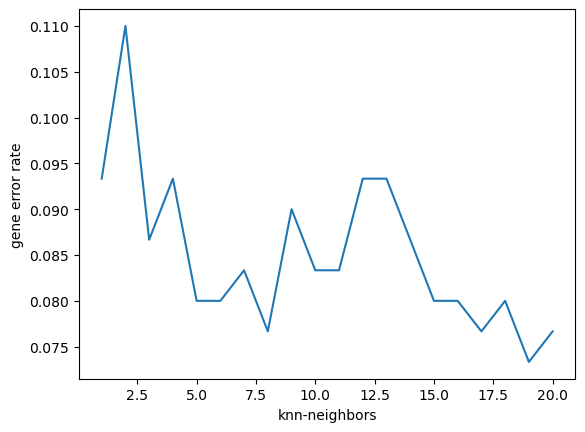

In [60]:
plt.plot(range(1,21),error_from_Gene)
plt.ylabel("gene error rate")
plt.xlabel("knn-neighbors")

In [121]:
knn_model_Gene = KNeighborsClassifier(n_neighbors=8)
knn_model_Gene.fit(scaledG_X_train,y_trainG)
yG_pred = knn_model_Gene.predict(scaledG_X_test)

c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [122]:
print(classification_report(y_testG,yG_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       136
           1       0.94      0.91      0.93       164

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



#### income Dataset

In [113]:
error_from_Income = []
for i in range(1,21):
    knn_modelG = KNeighborsClassifier(n_neighbors=i)
    knn_modelG.fit(scaledT_X_train,y_trainT)
    yT_predict = knn_modelG.predict(scaledT_X_test)
    testErrorT = 1- (accuracy_score(y_testT,yT_predict))
    error_from_Income.append(testErrorT)

c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [114]:
error_from_Income

[0.1976430149766757,
 0.175791799656273,
 0.17161797201080287,
 0.1630247974465996,
 0.1627792781733366,
 0.15885096980112934,
 0.15762337343481458,
 0.15344954578934444,
 0.15394058433587032,
 0.15344954578934444,
 0.15320402651608156,
 0.1519764301497668,
 0.15074883378345205,
 0.1522219494230297,
 0.1546771421556592,
 0.1544316228823963,
 0.15565921924871107,
 0.15418610360913332,
 0.15541369997544807,
 0.1549226614289222]

Text(0.5, 0, 'knn-neighbors')

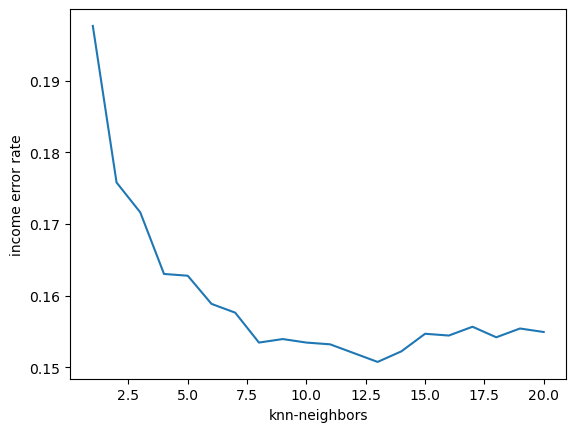

In [119]:
plt.plot(range(1,21),error_from_Income)
plt.ylabel("income error rate")
plt.xlabel("knn-neighbors")

In [123]:
knn_model_Income = KNeighborsClassifier(n_neighbors=8)
knn_model_Income.fit(scaledT_X_train,y_trainT)
yT_pred = knn_model_Income.predict(scaledT_X_test)

c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [124]:
print(classification_report(y_testT,yT_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3073
           1       0.75      0.57      0.65      1000

    accuracy                           0.85      4073
   macro avg       0.81      0.75      0.77      4073
weighted avg       0.84      0.85      0.84      4073



# SVM Model linear kernel - Gene

In [37]:
modelG = SVC(kernel='linear' , C=1000)
modelG.fit(scaledG_X_train, y_trainG)
yp_g_linear=modelG.predict(scaledG_X_test)

In [38]:
print(classification_report(y_testG,yp_g_linear))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       136
           1       0.86      0.86      0.86       164

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# SVM Model rbf kernel - Gene

In [39]:
modelG_rbf = SVC(kernel='rbf' , C=1, gamma='scale')
modelG_rbf.fit(scaledG_X_train, y_trainG)
yp_g_rbf=modelG_rbf.predict(scaledG_X_test)

In [40]:
print(classification_report(y_testG,yp_g_rbf))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       136
           1       0.93      0.93      0.93       164

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# SVM Model sigmoid kernel - Gene

In [41]:
modelG_sig = SVC(kernel='sigmoid')
modelG_sig.fit(scaledG_X_train, y_trainG)
yp_g_sig=modelG_sig.predict(scaledG_X_test)

In [42]:
print(classification_report(y_testG,yp_g_sig))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63       136
           1       0.69      0.68      0.69       164

    accuracy                           0.66       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.66      0.66      0.66       300



# SVM Model Linear Kernel - Heart Disease

In [ ]:
modelH = SVC(kernel='linear')
modelH.fit(scaledH_X_train, y_trainH)
yp_h_linear=modelH.predict(scaledH_X_test)

In [ ]:
print(classification_report(y_testH,yp_h_linear))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     22928
         1.0       0.00      0.00      0.00      2440

    accuracy                           0.90     25368
   macro avg       0.45      0.50      0.47     25368
weighted avg       0.82      0.90      0.86     25368



c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM Model rbf Kernel - Heart Disease

In [53]:
modelH_rbf = SVC(kernel='rbf')
modelH_rbf.fit(scaledH2_X_train, y_trainH2)
yp_h_rbf=modelH_rbf.predict(scaledH2_X_test)

In [54]:
print(classification_report(y_testH2,yp_h_rbf))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     11485
         1.0       0.58      0.05      0.10      1199

    accuracy                           0.91     12684
   macro avg       0.74      0.53      0.52     12684
weighted avg       0.88      0.91      0.87     12684



# SVM Model sigmoid Kernel - Heart Disease

In [ ]:
modelH_sig = SVC(kernel='sigmoid')
modelH_sig.fit(scaledH_X_train, y_trainH)
yp_h_sig=modelH_sig.predict(scaledH_X_test)

In [ ]:
print(classification_report(y_testH,yp_h_sig))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     22928
         1.0       0.23      0.23      0.23      2440

    accuracy                           0.85     25368
   macro avg       0.58      0.58      0.58     25368
weighted avg       0.85      0.85      0.85     25368



# SVM Model Linear Kernel - Income DataSet

In [43]:
modelI = SVC(kernel='linear')
modelI.fit(scaledT_X_train, y_trainT)
yp_t_linear=modelI.predict(scaledT_X_test)

In [44]:
print(classification_report(y_testT,yp_t_linear))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3073
           1       0.82      0.36      0.50      1000

    accuracy                           0.82      4073
   macro avg       0.82      0.67      0.69      4073
weighted avg       0.82      0.82      0.79      4073



# SVM Model RBF Kernel - Income Dataset

In [47]:
modelI_rbf = SVC(kernel='rbf')
modelI_rbf.fit(scaledT_X_train, y_trainT)
yp_t_rbf=modelI_rbf.predict(scaledT_X_test)

In [48]:
print(classification_report(y_testT,yp_t_rbf))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90      3073
           1       0.77      0.55      0.64      1000

    accuracy                           0.85      4073
   macro avg       0.82      0.75      0.77      4073
weighted avg       0.84      0.85      0.84      4073



# SVM Model Sigmoid Kernel - Income DataSet

In [45]:
modelI_sig = SVC(kernel='sigmoid')
modelI_sig.fit(scaledT_X_train, y_trainT)
yp_t_sig=modelI_sig.predict(scaledT_X_test)

In [46]:
print(classification_report(y_testT,yp_t_sig))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3073
           1       0.50      0.50      0.50      1000

    accuracy                           0.76      4073
   macro avg       0.67      0.67      0.67      4073
weighted avg       0.76      0.76      0.76      4073



# Gene Dataset final statistics 

For the gene dataset, KNN and RBF performed the best providing the same accuracy [0.92] and f1-score macro average [0.92]. However, when comparing their precision and recall, SVM model using an rbf kernel outperformed KNN, making it the best model for this dataset. This is due to the fact that the gene dataset is small in size making SVM an optimal model for it.

# Income Dataset final statistics

For the income dataset, KNN and SVM with RBF kernel performed the best. They both produced the same accuracy [0.85] and macro average f1-score [0.77]. As for precision and recall, both had the same recall but RBF had a higher precision set at [0.82]. Therefore, if all metrics are to be counted, the SVM model with an RBF kernel once again performed the best. Due to the average size of the dataset, both SVM and KNN gave similar performances.

# Heart Disease Dataset final statistics

For the heart disease dataset, the logistic regression model worked the best providing an accuracy of 0.91 and macroaverage f1-score of 0.58.
The rbf kernel model performed the second best with equivalent accuracy but a lower f1-score. However, the RBF model took the longest running time out of all the previous models, where it took 1000 minutes+ to run with no output in the end. This made us resort to cropping the heart disease dataset into half in order to obtain output from the RBF model, making it's running time a huge drawback. The SVM model with an RBF kernel performed horribly in this scenario due to the large dataset size.